# MobileNet

In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
mobile = keras.applications.mobilenet.MobileNet()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
def prepare_image(file):
    img_path = 'MobileNet-inference-images/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [4]:
from IPython.display import Image
Image(filename='MobileNet-inference-images/1.PNG', width=300,height=200) 

FileNotFoundError: [Errno 2] No such file or directory: 'MobileNet-inference-images/1.PNG'

In [ ]:
preprocessed_image = prepare_image('1.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

In [ ]:
Image(filename='MobileNet-inference-images/2.PNG', width=300,height=200) 

In [ ]:
preprocessed_image = prepare_image('2.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

In [ ]:
Image(filename='MobileNet-inference-images/3.PNG', width=300,height=200) 

In [ ]:
preprocessed_image = prepare_image('3.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

## Fine-tune MobileNet on cats and dogs

### Image preparation

In [5]:
train_path = 'C:/Users/abigiri/Desktop/ML/DeepLizard/cats-and-dogs/train/'
valid_path = 'C:/Users/abigiri/Desktop/ML/DeepLizard/cats-and-dogs/valid/'
test_path = 'C:/Users/abigiri/Desktop/ML/DeepLizard/cats-and-dogs/test/'

In [6]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 222 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


### Modify Model

In [7]:
mobile = keras.applications.mobilenet.MobileNet()

In [ ]:
mobile.summary()

In [8]:
x = mobile.layers[-6].output
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=predictions)

In [ ]:
model.summary()

In [9]:
for layer in model.layers[:-5]:
    layer.trainable = False

### Train the model

In [10]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit_generator(train_batches, steps_per_epoch=4, 
                    validation_data=valid_batches, validation_steps=2, epochs=10, verbose=2)

Epoch 1/10
 - 7s - loss: 0.0358 - acc: 1.0000 - val_loss: 0.1488 - val_acc: 0.8750
Epoch 2/10
 - 6s - loss: 0.4280 - acc: 0.8675 - val_loss: 0.1252 - val_acc: 0.8750
Epoch 3/10
 - 7s - loss: 0.0702 - acc: 0.9500 - val_loss: 0.1894 - val_acc: 0.8125
Epoch 4/10
 - 5s - loss: 0.0761 - acc: 1.0000 - val_loss: 0.1226 - val_acc: 0.8750
Epoch 5/10
 - 5s - loss: 0.0416 - acc: 1.0000 - val_loss: 0.0867 - val_acc: 0.9375
Epoch 6/10
 - 5s - loss: 0.0451 - acc: 1.0000 - val_loss: 0.1215 - val_acc: 0.8750
Epoch 7/10
 - 5s - loss: 0.1603 - acc: 0.9250 - val_loss: 0.1715 - val_acc: 0.9375
Epoch 8/10
 - 5s - loss: 0.2166 - acc: 0.8938 - val_loss: 0.0801 - val_acc: 0.9375
Epoch 9/10
 - 5s - loss: 0.1663 - acc: 0.9000 - val_loss: 0.1496 - val_acc: 0.8125
Epoch 10/10
 - 5s - loss: 0.0244 - acc: 1.0000 - val_loss: 0.1355 - val_acc: 0.8750


### Predict cats and dogs

In [15]:
test_labels = test_batches.classes

In [16]:
test_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [17]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

In [22]:
image2 = image.load_img('/Users/abigiri/Desktop/Newsletter-7.jpg', target_size=(224,224))
image2 = image.img_to_array(image2)
image2 = np.expand_dims(image2,axis=0)
prediction = model.predict(Newsletter-7.jpg)
response = {
    'prediction':{
        'cat':prediction[0][0],
        'dog':prediction[0][1]
    }
}
prediction
#if prediction[0][0] > prediction[0][1]:
#    print('This is a Cat.....may be')
#else:
#    print('This is a Dog.....may be')

array([[0.59521925, 0.40478072]], dtype=float32)

In [24]:
def prepare_image(file):
    img_path = '/Users/abigiri/Desktop/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

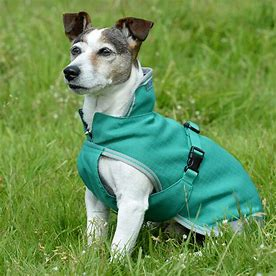

In [38]:
from IPython.display import Image
Image(filename='/Users/abigiri/Desktop/download.jpg', width=300,height=200) 

In [39]:
preprocessed_image = prepare_image('download.jpg')

In [42]:
prediction = model.predict(preprocessed_image)
response = {
    'prediction':{
        'cat':prediction[0][0],
        'dog':prediction[0][1]
    }
}
prediction
if prediction[0][0] > prediction[0][1]:
    print('Congrats!! you are a cat person.')
else:
    print('Congrats!! you are a dog person. Kevin the dog likes you <3')

Congrats!! you are a dog person.


In [43]:
model.save('mobile_abi.h5')

In [ ]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [ ]:
test_batches.class_indices

In [ ]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

## Fine-tune MobileNet on sign language digits

### Image preparation

Dataset:
https://github.com/ardamavi/Sign-Language-Digits-Dataset
- 10 classes (digits 0-9)
- Class data:

  - class 0: 205 images
  - class 1: 206 images
  - class 2: 206 images
  - class 3: 206 images
  - class 4: 207 images
  - class 5: 207 images
  - class 6: 207 images
  - class 7: 206 images
  - class 8: 208 images
  - class 9: 204 images

In [ ]:
# Save files to Sign Language Digits Dataset directory (which resides in current directory where this notebook is saved)
# Create train, valid, test folders in Sign Language Digits Dataset
%cd Sign-Language-Digits-Dataset
%mkdir train
%mkdir valid
%mkdir test

In [ ]:
# Move all class directories with images into train/
%mv 0/ 1/ 2/ 3/ 4/ 5/ 6/ 7/ 8/ 9/ train/

In [ ]:
# Make class directories for valid and test data sets
%cd valid
%mkdir 0/ 1/ 2/ 3/ 4/ 5/ 6/ 7/ 8/ 9/

%cd ../test
%mkdir 0/ 1/ 2/ 3/ 4/ 5/ 6/ 7/ 8/ 9/

In [ ]:
# In the next cell:
# Using bash, loop through each class directory in /train and randomly move 30 images from each class into the 
# corresponding class directory in /valid and 5 images from each class into the corresponding class directory in /test.

In [ ]:
%%bash
cd ../train
for ((i=0; i<=9; i++)); do
    a=$(find $i/ -type f | shuf -n 30)
    mv $a ../valid/$i/
    b=$(find $i/ -type f | shuf -n 5)
    mv $b ../test/$i/
done

In [ ]:
# Move back into current notebook directory
%cd ../..

In [ ]:
train_path = 'Sign-Language-Digits-Dataset/train'
valid_path = 'Sign-Language-Digits-Dataset/valid'
test_path = 'Sign-Language-Digits-Dataset/test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    test_path, target_size=(224,224), batch_size=10, shuffle=False)

### Modify Model

In [ ]:
mobile = keras.applications.mobilenet.MobileNet()

In [ ]:
mobile.summary()

In [ ]:
x = mobile.layers[-6].output
predictions = Dense(10, activation='softmax')(x)

In [ ]:
model = Model(inputs=mobile.input, outputs=predictions)

In [ ]:
model.summary()

In [ ]:
for layer in model.layers[:-23]:
    layer.trainable = False

### Train the model

In [ ]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit_generator(train_batches, steps_per_epoch=18, 
                    validation_data=valid_batches, validation_steps=3, epochs=60, verbose=2)

### Predict sign language digits

In [ ]:
test_labels = test_batches.classes

In [ ]:
predictions = model.predict_generator(test_batches, steps=5, verbose=0)

In [ ]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [ ]:
test_batches.class_indices

In [ ]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')